In [68]:
import numpy as np
import sympy as sp
from IPython.display import HTML
import ipywidgets as widgets
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
mpl.rcParams['legend.fontsize'] = 10
import pandas as pd
import itertools

# This is commented out
#%matplotlib widget

# function to print latex
def renderListToLatex(e):
    latex_rendering = []

    for i in range(len(e)):
        latex_rendering.append("$$" + sp.latex(e[i]) + "$$")
    
    return(HTML("".join(latex_rendering[0:])))
    
    
def convert3DVectorToSQRTOfQuadrance(v):
    return(sp.N(sp.sqrt(sum([v.args[i].args[0]**2 for i in range(len(v.args))]))))



def convert3DVectorToComponents(v, scaleChoice):
    print(v)
    return(sp.parse_expr(str(v.args).replace('i', scaleChoice).replace("j", scaleChoice).replace("k", scaleChoice)))
    

#### 4: Motion in 2 and 3 dimensions

In [69]:
# Aims: 
# Calculate position vectors
# Solve for displacement in 2 or 3 dimensions
# Get velocity vector given position vector as function of time
# Calculate average velocity in multiple dimensions

In [70]:
# 4.1
i, j, k = sp.symbols('i, j, k')
v1 = sp.N(6770 * i * sp.cos(sp.pi/2) + 6770 * j * sp.sin(sp.pi/2))
v2 = sp.N(6770 * i * sp.cos(-sp.pi/4) + 6770 * j * sp.sin(-sp.pi/4))
renderListToLatex([v1, v2])

In [71]:
# Let v3 be the differ
v3 = v1 - v2
v3

-4787.11290863293*i + 11557.1129086329*j

In [72]:
v3Distance = sp.sqrt(sum([v3.args[i].args[0]**2 for i in range(len(v3.args))]))
v3Distance

12509.3288702028

In [73]:
sp.N(np.arctan(- 11557 / 4787) * (180 / sp.pi))

-67.5002798823755

In [74]:
# Example 4.2

i, j, k = sp.symbols('i, j, k')

r1 = 2 * i + j + 3 * k
r2 = -i + 3 * k
r3 = 4 * i - 2 * j + k
r4 = -3 * i + j + 2 * k

r5 = r1 + r2 + r3 + r4

In [75]:
r5

2*i + 9*k

In [76]:
r5.args[0].args[0]

2

In [77]:
magnitude = sp.N(sp.sqrt(sum([r5.args[i].args[0]**2 for i in range(len(r5.args))])))
magnitude

9.21954445729289

In [78]:
direction = sp.N(np.arctan(9/ 2) * 180/sp.pi)
direction

77.4711922908485

In [79]:
# 4.3

In [80]:
i, j, k, t, m, s = sp.symbols('i j k t m s')

# Let g1 be a position function
g1 = 2 * t**2 * i + (2 + 3 * t) * j + 5 * t * k

# Let g2 be the derivative of position function with respect to time
# which is called the velocity vector 
g2 = sp.diff(g1, t)

# Let g3 be the instaneous velocity at 2 seconds
g3 = g2.subs(t, 2)

# Let g4 be the speed of the vector function at 2 seconds
# using the convert to sqrt quadrance function
g4 = convert3DVectorToSQRTOfQuadrance(g3)

# Let g5 be the average velocity between 1s and 3s 
g5 = (g2.subs(t, 3)+ g2.subs(t, 1)) / 2

# Solutions
g3, g4, g5

(8*i + 3*j + 5*k, 9.89949493661167, 8*i + 3*j + 5*k)

In [81]:
# 4.4

# Create needed variables 
i, j, k, m, s, t = sp.symbols('i, j, k, m, s, t')

# Let g1 be a velocity function 
g1 = 5 * t * i + t**2 * j - 2 * t**3 * k 

# Let g2 be the derivative of g1 with respect to t, an accleeration function 
g2 = sp.diff(g1, t)

# Let g3 be the acceleration vector at t = 2
g3 = g2.subs(t, 2)
g3

# Let g4 be the magnitude of the accerlation vector g3
g4 = convert3DVectorToSQRTOfQuadrance(g3)
g4

# Note at t = 2, the partice is travelling at 24.8 m / s^2

24.8394846967484

In [82]:
# 4.5
# Create needed variables 
i, j, k, t = sp.symbols('i, k, j, t')

# Let g1 be a position function 
g1 = (10 * t - t**2) * i + 5 * t * j + 5 * t * k

# Let g2 be a velocity function of g1
g2 = sp.diff(g1, t)


# Let g3 be an acceleration function of g2
g3 = sp.diff(g2, t)

# Note the velocity is linear in time, and constant in the y and z directions
# Acceleration is constant and in negative direction

g2


i*(10 - 2*t) + 5*j + 5*k

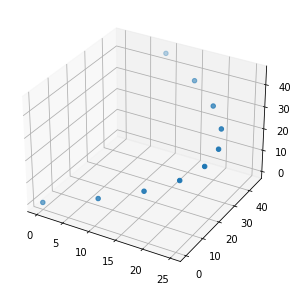

In [41]:
g5 = np.arange(0, 10, 1)

g6 = [[-t**2 + 10*t, 5*t, 5*t] for t in range(len(g5))]

g7 = [g6[i][0] for i in range(len(g6))]
g8 =  [g6[i][1] for i in range(len(g6))]
g9 =  [g6[i][2] for i in range(len(g6))]


fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(projection='3d')

p = ax1.scatter(g7, g8, g9, label = "")

In [86]:
# 4.6